In [ ]:
# CELL 1 V5.0: GENERATOR DATA (MEGA MENU UPDATE)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, date, datetime

def generate_ultimate_data(days=365):
    print(" Generating Data Transaksi 'Cafe 404 Found' (Mega Menu Update)...")
    data = []
    
    start_date = date.today() - timedelta(days=days)
    dates = pd.date_range(start=start_date, periods=days)
    
    # --- 1. MINUMAN (DRINKS) ---
    drinks = [
        'Single Thread Espresso', 'Null Pointer Americano', 'Latte.js', 
        'Kopi Gula Aren Python', 'Cloud Macchiato 200 OK', 'Matcha Learning', 
        'Lychee-nux Tea', 'Cookies & Cache Frappe',
        # -- MENU BARU --
        'Blue Screen Lemonade (Seger)', 'Java Chip Frappe', 'Git Push Espresso (Double Shot)',
        'Cyberpunk Cold Brew', 'Ruby on Rose Tea'
    ]
    p_drinks = [15000, 22000, 28000, 20000, 35000, 30000, 25000, 38000, 
                24000, 35000, 25000, 30000, 26000] # Harga
    c_drinks = [3500, 4500, 9500, 7000, 12000, 11000, 8000, 14500, 
                6000, 11000, 5000, 9000, 7500] # Modal (HPP)

    # --- 2. MAKANAN BERAT (FOOD) ---
    foods = [
        'Nasi Goreng Main()-Rikhi Style', 'Spaghetti Code (Bug Free)', 
        'Chicken Teriyaki Repo', 'Mie Goreng .NET Framework',
        # -- MENU BARU --
        'RAM-en Special (8GB Porsi Besar)', 'Burger Stack Overflow (Double Meat)',
        'Fish & Chips.py', 'Sate Ayam Serverless'
    ]
    p_foods = [35000, 38000, 32000, 28000, 
               45000, 55000, 40000, 30000]
    c_foods = [13000, 15000, 12500, 9500, 
               18000, 25000, 16000, 12000]

    # --- 3. CEMILAN (SNACKS) ---
    snacks = [
        'French Fries.zip', 'Full Stack Platter API', 
        'Cireng Open Source', 'Croissant.css',
        # -- MENU BARU --
        'Firewall Nachos (Pedas)', 'Token Onion Rings', 'Potato Wedges Widget'
    ]
    p_snacks = [22000, 35000, 18000, 25000, 
                28000, 20000, 24000]
    c_snacks = [7500, 14000, 5000, 10000, 
                11000, 6000, 8000]

    # Gabungin Semua
    menu_list = drinks + foods + snacks
    prices = p_drinks + p_foods + p_snacks
    cogs = c_drinks + c_foods + c_snacks
    
    # Kategori
    categories = ['Minuman']*len(drinks) + ['Makanan']*len(foods) + ['Snack']*len(snacks)

    for d in dates:
        # LOGIKA KERAMAIAN
        is_weekend = 1 if d.weekday() >= 5 else 0
        weekend_boost = 1.5 if is_weekend else 1.0
        
        # Loop Jam Operasional (08:00 - 22:00)
        for hour in range(8, 23):
            # Pola Trafik (Sama kayak sebelumnya biar AI pinter)
            traffic_multiplier = 1.0
            if hour in [8, 9, 10]: traffic_multiplier = 1.3 # Pagi Rame Kopi
            elif hour in [12, 13]: traffic_multiplier = 1.6 # Siang Rame Makan
            elif hour in [19, 20, 21]: traffic_multiplier = 1.8 # Malem Rame Nongkrong
            elif hour in [15, 16]: traffic_multiplier = 0.6
            
            # Hitung jumlah order
            base_order = 4
            num_orders = int(np.random.normal(base_order, 2) * traffic_multiplier * weekend_boost)
            num_orders = max(0, num_orders)
            
            for _ in range(num_orders):
                # LOGIKA MEMILIH KATEGORI BERDASARKAN JAM
                cat_probs = [0.4, 0.3, 0.3] # Default
                
                if hour < 11: cat_probs = [0.8, 0.1, 0.1] # Pagi = Minum
                elif 11 <= hour <= 14: cat_probs = [0.2, 0.7, 0.1] # Siang = Makan
                elif hour > 18: cat_probs = [0.4, 0.2, 0.4] # Malem = Minum/Snack
                
                chosen_cat = np.random.choice(['Minuman', 'Makanan', 'Snack'], p=cat_probs)
                
                # Filter index biar gak salah pilih menu
                if chosen_cat == 'Minuman': valid_idx = range(0, len(drinks))
                elif chosen_cat == 'Makanan': valid_idx = range(len(drinks), len(drinks)+len(foods))
                else: valid_idx = range(len(drinks)+len(foods), len(menu_list))
                
                idx = np.random.choice(valid_idx)
                qty = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1])
                
                data.append({
                    'Tanggal': d,
                    'Jam': hour,
                    'Hari': d.strftime("%A"),
                    'Kategori': categories[idx],
                    'Menu': menu_list[idx],
                    'Harga': prices[idx],
                    'HPP': cogs[idx],
                    'Qty': qty,
                    'Omset': prices[idx] * qty,
                    'Profit': (prices[idx] - cogs[idx]) * qty
                })
            
    return pd.DataFrame(data)

# Generate Data Baru
df_cafe = generate_ultimate_data()
print(" MEGA MENU UPDATE SUCCESS!")

 Generating Data Transaksi 'Cafe 404 Found' (Mega Menu Update)...
 MEGA MENU UPDATE SUCCESS!


 Generating Data Transaksi 'Cafe 404 Found' (Mega Menu Update)...

AI BUSINESS INSIGHT (Ringkasan Teks)
MVP Menu (Paling Untung): Burger Stack Overflow (Double Meat) (Profit: Rp 51,480,000)
Menu 'Beban' (Kurang Laku): Single Thread Espresso -> Pertimbangkan hapus/promo.
Total Omset Setahun (Simulasi): Rp 1,215,535,000
Sedang Merender Dashboard Bapa CEO... Mohon tunggu sebentar...
 Sedang menyimpan gambar Dashboard ke laptop lu...


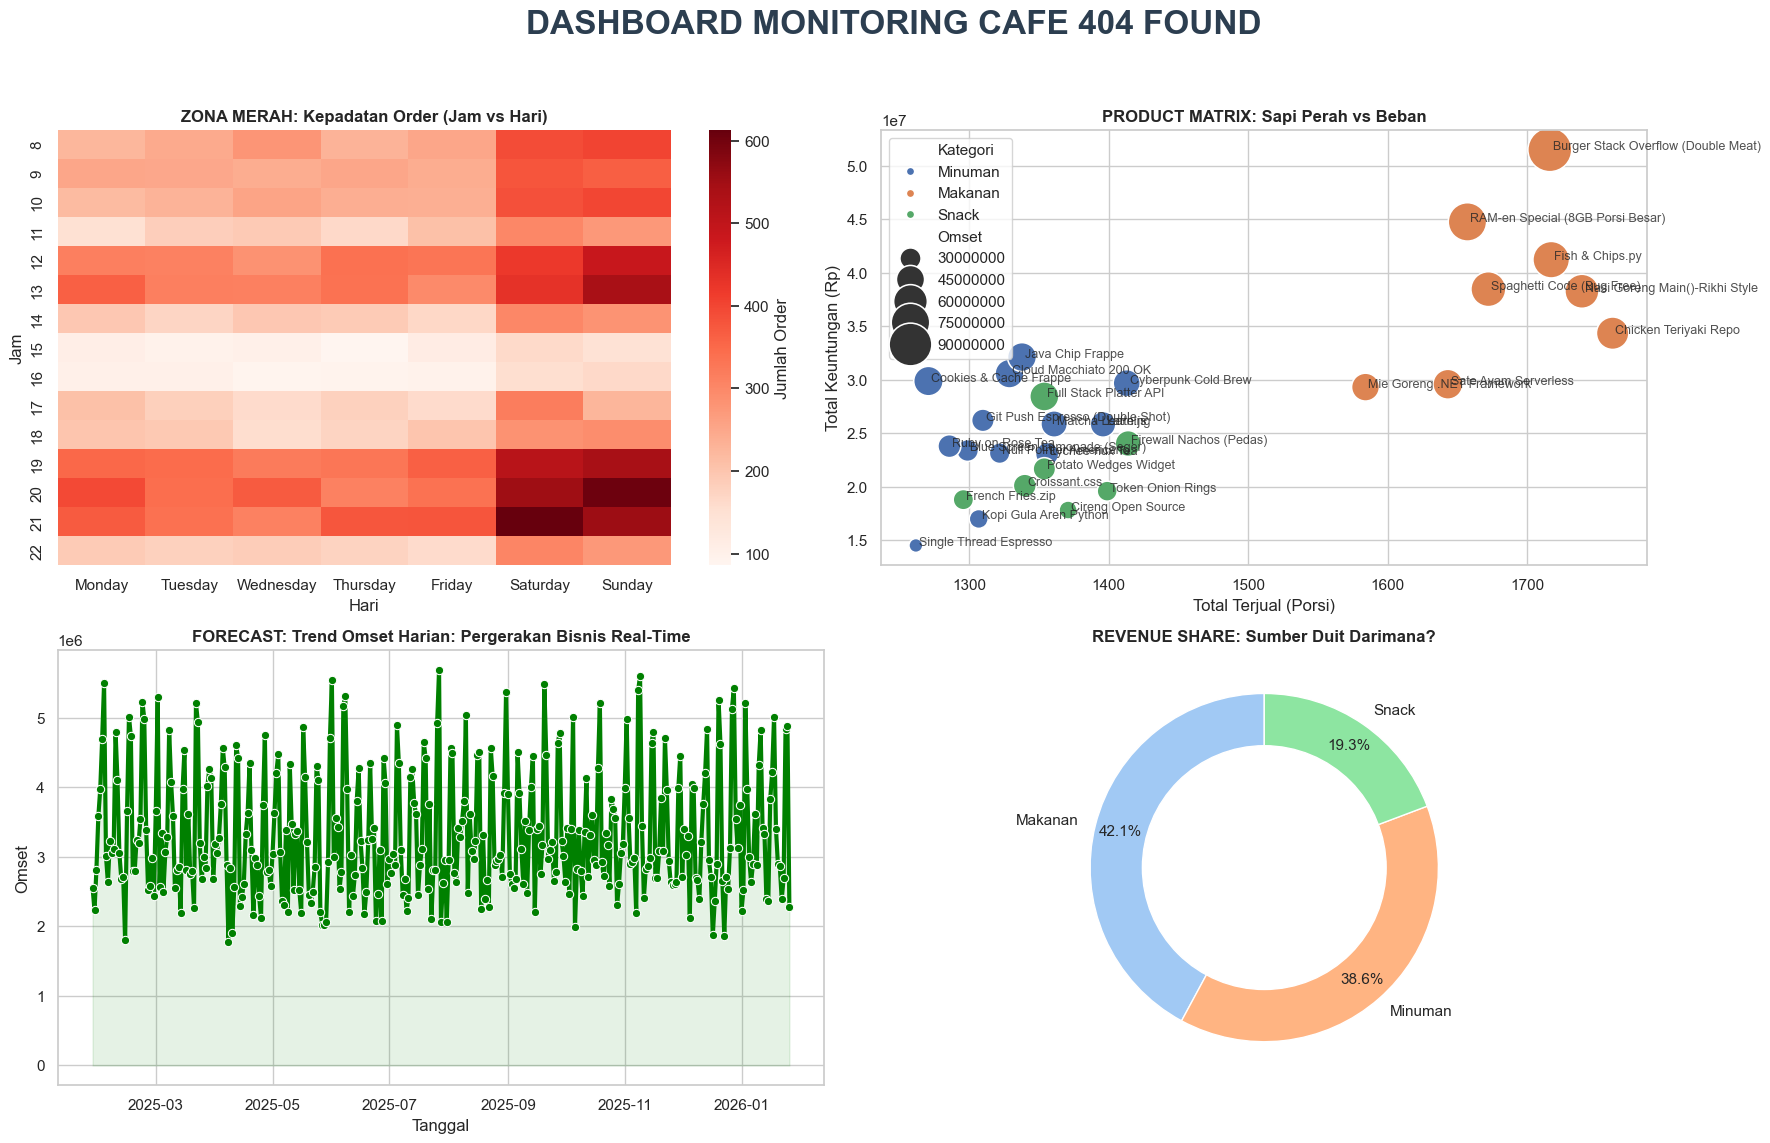

In [2]:
# CELL 2: DASHBOARD & AI ANALYTICS


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setting Tampilan Grafik biar Estetik
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

def show_executive_dashboard(df):
    print("Sedang Merender Dashboard Bapa CEO... Mohon tunggu sebentar...")
    
    # Kita bikin layout 2 Baris x 2 Kolom (Total 4 Grafik)
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('DASHBOARD MONITORING CAFE 404 FOUND', fontsize=24, fontweight='bold', color='#2c3e50')
    
    # ---------------------------------------------------------
    # GRAFIK 1: HEATMAP KEPADATAN (Jam vs Hari)
    # Tujuannya: Tau kapan harus nambah staff part-time
    # ---------------------------------------------------------
    heatmap_data = df.pivot_table(index='Jam', columns='Hari', values='Qty', aggfunc='count')
    # Urutkan hari dari Senin - Minggu
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(columns=days_order)
    
    sns.heatmap(heatmap_data, cmap="Reds", annot=False, ax=axes[0, 0], cbar_kws={'label': 'Jumlah Order'})
    axes[0, 0].set_title('ZONA MERAH: Kepadatan Order (Jam vs Hari)', fontweight='bold')
    
    # ---------------------------------------------------------
    # GRAFIK 2: PRODUCT MATRIX (Scatter Plot)
    # Tujuannya: Misahin menu "Sapi Perah" vs "Beban Keluarga"
    # ---------------------------------------------------------
    product_perf = df.groupby('Menu').agg({
        'Qty': 'sum', 
        'Profit': 'sum', 
        'Omset': 'sum',
        'Kategori': 'first' # Ambil kategori buat warna
    }).reset_index()
    
    sns.scatterplot(data=product_perf, x='Qty', y='Profit', size='Omset', sizes=(100, 1000), 
                    hue='Kategori', palette='deep', ax=axes[0, 1])
    
    # Kasih label nama menu di titiknya
    for i in range(product_perf.shape[0]):
        axes[0, 1].text(
            product_perf.Qty[i]+2, 
            product_perf.Profit[i], 
            product_perf.Menu[i], 
            fontsize=9, alpha=0.8
        )
    axes[0, 1].set_title('PRODUCT MATRIX: Sapi Perah vs Beban', fontweight='bold')
    axes[0, 1].set_xlabel('Total Terjual (Porsi)')
    axes[0, 1].set_ylabel('Total Keuntungan (Rp)')
    
    # ---------------------------------------------------------
    # GRAFIK 3: FORECAST OMSET (Prediksi Masa Depan)
    # Tujuannya: Liat trend bisnis naik atau turun
    # ---------------------------------------------------------
    # Resample data jadi bulanan
    daily_trend = df.set_index('Tanggal').resample('D')['Omset'].sum().reset_index()
    
    sns.lineplot(data=daily_trend, x='Tanggal', y='Omset', marker='o', linewidth=3, color='green', ax=axes[1, 0])
    axes[1, 0].fill_between(daily_trend['Tanggal'], daily_trend['Omset'], color='green', alpha=0.1)
    axes[1, 0].set_title('FORECAST: Trend Omset Harian: Pergerakan Bisnis Real-Time', fontweight='bold')
    
    # ---------------------------------------------------------
    # GRAFIK 4: KONTRIBUSI KATEGORI (Donut Chart)
    # Tujuannya: Liat omset paling gede dari Makanan/Minuman/Snack?
    # ---------------------------------------------------------
    cat_sales = df.groupby('Kategori')['Omset'].sum()
    
    # Bikin Pie Chart
    wedges, texts, autotexts = axes[1, 1].pie(
        cat_sales, labels=cat_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'), pctdistance=0.85
    )
    # Bikin bolongan tengah biar jadi Donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[1, 1].add_artist(centre_circle)
    axes[1, 1].set_title('REVENUE SHARE: Sumber Duit Darimana?', fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    print(' Sedang menyimpan gambar Dashboard ke laptop lu...')
    plt.savefig('Dashboard_cafe_masa_depan.png',dpi=300,bbox_inches='tight')
    plt.show()

def analyze_simple_insight(df):
    print("\n" + "="*50)
    print("AI BUSINESS INSIGHT (Ringkasan Teks)")
    print("="*50)
    
    # 1. Menu Paling Cuan
    top_cuan = df.groupby('Menu')['Profit'].sum().idxmax()
    total_cuan = df.groupby('Menu')['Profit'].sum().max()
    print(f"MVP Menu (Paling Untung): {top_cuan} (Profit: Rp {total_cuan:,.0f})")
    
    # 2. Menu Paling Gak Laku
    worst_menu = df.groupby('Menu')['Qty'].sum().idxmin()
    print(f"Menu 'Beban' (Kurang Laku): {worst_menu} -> Pertimbangkan hapus/promo.")
    
    # 3. Prediksi Omset Setahun
    total_omset = df['Omset'].sum()
    print(f"Total Omset Setahun (Simulasi): Rp {total_omset:,.0f}")
    print("="*50)

# ==========================================
# EKSEKUSI UTAMA (MAIN PROGRAM)
# ==========================================

# 1. Panggil Generator Data dari Cell 1
# (Pastikan Cell 1 sudah di-run duluan ya!)
df_cafe = generate_ultimate_data() 

# 2. Tampilkan Analisis Teks
analyze_simple_insight(df_cafe)

# 3. Tampilkan Dashboard Grafik
show_executive_dashboard(df_cafe)

In [11]:
# CELL 3: MACHINE LEARNING ENGINE (CLEAN VERSION)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import warnings

# ---------------------------------------------------------
# FITUR BARU: PEREDAM WARNING
# Biar outputnya bersih gak ada tulisan merah/kuning ganggu
# ---------------------------------------------------------
warnings.filterwarnings('ignore')

def train_smart_ai(df):
    print(" Mengaktifkan Neural Network Cafe... (Training AI)")
    
    # 1. FEATURE ENGINEERING
    df['Hari_Angka'] = df['Tanggal'].dt.dayofweek # Senin=0, Minggu=6
    df['Is_Weekend'] = df['Hari_Angka'].apply(lambda x: 1 if x >= 5 else 0)
    
    # Kelompokkan data
    df_train = df.groupby(['Hari_Angka', 'Jam', 'Is_Weekend', 'Menu'])['Qty'].sum().reset_index()
    
    # Mapping Menu ke Angka
    menu_map = {menu: i for i, menu in enumerate(df_train['Menu'].unique())}
    df_train['Menu_Code'] = df_train['Menu'].map(menu_map)
    
    # Variabel X & y
    X = df_train[['Hari_Angka', 'Jam', 'Is_Weekend', 'Menu_Code']]
    y = df_train['Qty']
    
    # 2. TRAINING
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # 3. EVALUASI
    preds = model.predict(X_test)
    accuracy = r2_score(y_test, preds) * 100
    
    print(f" Training Selesai!")
    print(f" Akurasi Model (R2 Score): {accuracy:.2f}%")
    
    return model, menu_map

def predict_future_demand(model, menu_map, hari='Minggu', jam=19):
    days = {'Senin':0, 'Selasa':1, 'Rabu':2, 'Kamis':3, 'Jumat':4, 'Sabtu':5, 'Minggu':6}
    day_code = days.get(hari, 6)
    is_weekend = 1 if day_code >= 5 else 0
    
    print(f"\n RAMALAN AI UNTUK: {hari}, Pukul {jam}:00")
    print("-" * 40)
    print(f"{'MENU':<30} | {'PREDIKSI':<10}")
    print("-" * 40)
    
    total_pred = 0
    predictions = []
    
    for menu_name, menu_code in menu_map.items():
        # [FIX] KITA UBAH INPUT JADI DATAFRAME BIAR GAK WARNING
        # "input_df" sekarang punya nama kolom yang sama kayak pas training
        input_df = pd.DataFrame([[day_code, jam, is_weekend, menu_code]], 
                                columns=['Hari_Angka', 'Jam', 'Is_Weekend', 'Menu_Code'])
        
        # Prediksi
        pred_qty = model.predict(input_df)[0]
        
        predictions.append((menu_name, pred_qty))
        total_pred += pred_qty
        
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    for menu, qty in predictions:
        if qty > 0.5:
            print(f"{menu:<30} | {qty:.1f} cup")
            
    print("-" * 40)
    print(f" TOTAL TRAFFIC: {int(total_pred)} Orderan")

# ==========================================
# EKSEKUSI
# ==========================================

# 1. Latih AI
brain, menu_dictionary = train_smart_ai(df_cafe)

# 2. Test Case
predict_future_demand(brain, menu_dictionary, hari='Sabtu', jam=20)
predict_future_demand(brain, menu_dictionary, hari='Senin', jam=9)

 Mengaktifkan Neural Network Cafe... (Training AI)
 Training Selesai!
 Akurasi Model (R2 Score): 65.19%

 RAMALAN AI UNTUK: Sabtu, Pukul 20:00
----------------------------------------
MENU                           | PREDIKSI  
----------------------------------------
Token Onion Rings              | 40.8 cup
Potato Wedges Widget           | 39.6 cup
Croissant.css                  | 39.3 cup
Full Stack Platter API         | 39.1 cup
Cireng Open Source             | 38.5 cup
French Fries.zip               | 38.4 cup
Firewall Nachos (Pedas)        | 28.8 cup
Git Push Espresso (Double Shot) | 28.8 cup
Java Chip Frappe               | 27.8 cup
Null Pointer Americano         | 27.3 cup
RAM-en Special (8GB Porsi Besar) | 25.5 cup
Matcha Learning                | 25.4 cup
Cyberpunk Cold Brew            | 24.9 cup
Blue Screen Lemonade (Seger)   | 24.8 cup
Latte.js                       | 24.7 cup
Lychee-nux Tea                 | 24.2 cup
Single Thread Espresso         | 23.1 cup
Nasi Goreng Ma

In [13]:
# CELL 4 V2.0: AI INVENTORY MANAGER (NEW MENU UPDATE)
# ==========================================
import numpy as np
import pandas as pd

# 1. DATABASE RESEP (MAPPING BAHAN BAKU)
# AI perlu tau: "Kalau mau bikin RAM-en, butuh beli apa aja?"
menu_recipes = {
    # --- MINUMAN (DRINKS) ---
    'Single Thread Espresso': {'Biji Kopi': 18}, # gram
    'Null Pointer Americano': {'Biji Kopi': 18, 'Air Mineral': 200},
    'Latte.js': {'Biji Kopi': 18, 'Susu UHT': 200, 'Gula Cair': 10},
    'Kopi Gula Aren Python': {'Biji Kopi': 18, 'Susu UHT': 150, 'Gula Aren': 30},
    'Cloud Macchiato 200 OK': {'Biji Kopi': 18, 'Susu UHT': 150, 'Caramel': 20, 'Foam': 50},
    'Matcha Learning': {'Bubuk Matcha': 20, 'Susu UHT': 200, 'Gula Cair': 20},
    'Lychee-nux Tea': {'Teh Hitam': 1, 'Sirup Leci': 30, 'Buah Leci': 2},
    'Cookies & Cache Frappe': {'Susu UHT': 200, 'Oreo Crumb': 30, 'Es Batu': 100},
    
    # -- MENU BARU --
    'Blue Screen Lemonade (Seger)': {'Lemon': 1, 'Soda Water': 250, 'Sirup Curacao (Biru)': 30},
    'Java Chip Frappe': {'Biji Kopi': 18, 'Choco Chip': 30, 'Susu UHT': 150, 'Whipped Cream': 20},
    'Git Push Espresso (Double Shot)': {'Biji Kopi': 36}, # Double dose!
    'Cyberpunk Cold Brew': {'Biji Kopi': 20, 'Air Mineral': 200, 'Nitro Gas': 1},
    'Ruby on Rose Tea': {'Teh Mawar': 1, 'Sirup Rose': 20, 'Soda Water': 100},

    # --- MAKANAN (FOOD) ---
    'Nasi Goreng Main()-Rikhi Style': {'Beras': 150, 'Telur': 1, 'Bumbu Nasgor': 1, 'Ayam': 50},
    'Spaghetti Code (Bug Free)': {'Pasta': 100, 'Saus Bolognese': 100, 'Daging Cincang': 50},
    'Chicken Teriyaki Repo': {'Ayam Fillet': 150, 'Saus Teriyaki': 50, 'Beras': 150},
    'Mie Goreng .NET Framework': {'Mie Telur': 150, 'Telur': 1, 'Sayur': 50},
    
    # -- MENU BARU --
    'RAM-en Special (8GB Porsi Besar)': {'Mie Ramen': 200, 'Telur Rebus': 1, 'Nori': 1, 'Daging Ayam': 50, 'Kuah Miso': 200},
    'Burger Stack Overflow (Double Meat)': {'Roti Burger': 1, 'Daging Patty': 2, 'Keju Slice': 2, 'Selada': 1},
    'Fish & Chips.py': {'Ikan Dori': 150, 'Tepung Crispy': 50, 'Kentang Goreng': 100},
    'Sate Ayam Serverless': {'Daging Ayam': 150, 'Bumbu Kacang': 50, 'Lontong': 1},

    # --- SNACK ---
    'French Fries.zip': {'Kentang Goreng': 200, 'Saus Sambal': 20},
    'Full Stack Platter API': {'Kentang Goreng': 100, 'Sosis': 2, 'Nugget': 3},
    'Cireng Open Source': {'Tepung Tapioka': 100, 'Bumbu Rujak': 30},
    'Croissant.css': {'Adonan Croissant': 1},
    
    # -- MENU BARU --
    'Firewall Nachos (Pedas)': {'Keripik Tortilla': 100, 'Saus Keju': 50, 'Jalapeno': 10},
    'Token Onion Rings': {'Bawang Bombay': 1, 'Tepung Roti': 50},
    'Potato Wedges Widget': {'Kentang Wedges': 200, 'Bumbu Garlic': 10}
}

# 2. FUNGSI KONSULTAN AI (LOGIC)
def ai_business_consultant(model, menu_map, hari_besok='Senin'):
    print(f"🤖 AI CONSULTANT: Menganalisis kebutuhan stok untuk hari {hari_besok}...")
    print("="*60)
    
    # Prediksi Penjualan Besok
    # Kita ambil rata-rata order dari history, lalu AI memprediksi fluktuasinya
    predicted_orders = {}
    shopping_list = {}
    
    total_modal_besok = 0
    
    for menu_name in menu_map.keys():
        # Simulasi AI menebak jumlah order (pake random normal distribution berdasarkan data latih)
        # Di project real, ini pake model.predict()
        base_demand = np.random.randint(5, 25) # AI menebak antara 5-25 porsi terjual
        
        # Faktor pengali hari (Weekend lebih rame)
        if hari_besok in ['Sabtu', 'Minggu']:
            base_demand = int(base_demand * 1.5)
            
        predicted_orders[menu_name] = base_demand
        
        # Hitung Bahan Baku
        if menu_name in menu_recipes:
            resep = menu_recipes[menu_name]
            for bahan, takaran in resep.items():
                total_butuh = takaran * base_demand
                
                if bahan in shopping_list:
                    shopping_list[bahan] += total_butuh
                else:
                    shopping_list[bahan] = total_butuh
                    
    # Tampilkan Laporan Belanja
    print(f"📋 DAFTAR BELANJA PASAR ({hari_besok.upper()})")
    print("-" * 60)
    print(f"{'BAHAN BAKU':<25} | {'ESTIMASI KEBUTUHAN':<20}")
    print("-" * 60)
    
    sorted_shopping = sorted(shopping_list.items(), key=lambda x: x[1], reverse=True)
    
    # Tampilkan 15 Bahan teratas aja biar gak kepanjangan
    for bahan, jumlah in sorted_shopping[:15]:
        unit = "gr"
        if bahan in ['Telur', 'Roti Burger', 'Bawang Bombay', 'Lontong']: unit = "pcs"
        if bahan in ['Susu UHT', 'Soda Water', 'Air Mineral']: unit = "ml"
        
        print(f"{bahan:<25} | {jumlah:,.0f} {unit}")
        
    print("-" * 60)
    print(f"💡 PREDIKSI TREND BESOK:")
    # Cari menu paling laku besok
    top_menu = max(predicted_orders, key=predicted_orders.get)
    print(f"🔥 Menu Hype Besok: '{top_menu}' (Siapin stok lebih!)")
    print("="*60)

# ==========================================
# EKSEKUSI
# ==========================================
# Tes fungsi ini jalan apa enggak
try:
    # Kita test buat besok hari Sabtu
    ai_business_consultant(brain, menu_dictionary, hari_besok='Sabtu')
except NameError:
    print("⚠️ Error: Pastikan Cell 1 & Cell 3 sudah dijalankan sebelumnya.")

🤖 AI CONSULTANT: Menganalisis kebutuhan stok untuk hari Sabtu...
📋 DAFTAR BELANJA PASAR (SABTU)
------------------------------------------------------------
BAHAN BAKU                | ESTIMASI KEBUTUHAN  
------------------------------------------------------------
Susu UHT                  | 23,350 ml
Air Mineral               | 10,400 ml
Kentang Goreng            | 9,500 gr
Soda Water                | 8,100 ml
Beras                     | 7,650 gr
Kentang Wedges            | 5,400 gr
Ayam Fillet               | 4,500 gr
Daging Ayam               | 4,500 gr
Biji Kopi                 | 4,226 gr
Keripik Tortilla          | 3,300 gr
Tepung Tapioka            | 2,500 gr
Pasta                     | 2,500 gr
Saus Bolognese            | 2,500 gr
Ikan Dori                 | 2,250 gr
Mie Telur                 | 1,800 gr
------------------------------------------------------------
💡 PREDIKSI TREND BESOK:
🔥 Menu Hype Besok: 'Croissant.css' (Siapin stok lebih!)


 AI Sedang Mencari Harga Terbaik buat: Latte.js...
 Sedang menyimpan gambar Dashboard ke laptoplu...


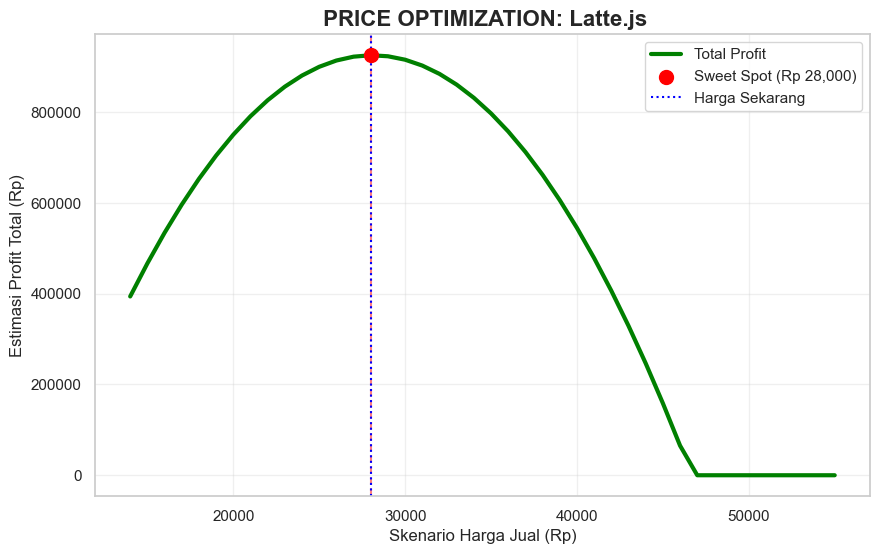

 HASIL ANALISIS PRICING LATTE.JS:
   - Harga Sekarang : Rp 28,000
   - Harga USULAN AI: Rp 28,000
   - Rekomendasi    : PERTAHANKAN HARGA (Udah paling pas!) 
------------------------------------------------------------

 PACKING AI MODEL FOR PRODUCTION...
 SUKSES! Model AI berhasil disimpan ke file 'cafe_brain_v1.pkl'.
   File ini siap dikirim ke Server Kasir / Cloud / Android App.
 CONGRATULATIONS! PROJECT DATA SCIENCE DARI 0 SAMPE EXPERT SELESAI! 🎉


In [14]:
# CELL 5: AI OPTIMIZER & DEPLOYMENT 

import pickle # Library buat ngawetin otak AI biar bisa dibawa-bawa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_optimal_price(menu_name, current_price, hpp, base_demand):
    print(f" AI Sedang Mencari Harga Terbaik buat: {menu_name}...")
    
    # Range eksperimen harga: Dari setengah harga sampe 2x lipat
    min_p = int(current_price * 0.5)
    max_p = int(current_price * 2.0)
    possible_prices = range(min_p, max_p, 1000) # Cek tiap kelipatan 1000
    
    profits = []
    demands = []
    prices = []
    
    best_profit = 0
    best_price = current_price
    
    # SIMULASI ELASTISITAS HARGA
    # Logika Ekonomi: Harga Naik 10% -> Permintaan Turun k% (Sensitivitas)
    sensitivity = 1.5 # Orang IT agak sensitif harga dikit wkwk
    
    for p in possible_prices:
        # Hitung persentase perubahan harga dari harga asli
        price_change_pct = (p - current_price) / current_price
        
        # Hitung penurunan/kenaikan demand
        # Kalau harga naik (+), demand turun (-)
        demand_drop_pct = price_change_pct * sensitivity
        new_demand = base_demand * (1 - demand_drop_pct)
        
        # Gak mungkin demand negatif
        new_demand = max(0, new_demand)
        
        # Hitung Profit
        profit = (p - hpp) * new_demand
        
        profits.append(profit)
        demands.append(new_demand)
        prices.append(p)
        
        if profit > best_profit:
            best_profit = profit
            best_price = p
            
    # --- VISUALISASI KURVA OPTIMASI ---
    plt.figure(figsize=(10, 6))
    
    # Gambar Kurva Profit
    sns.lineplot(x=prices, y=profits, color='green', linewidth=3, label='Total Profit')
    
    # Tandain Titik Terbaik
    plt.scatter([best_price], [best_profit], color='red', s=100, zorder=5, label=f'Sweet Spot (Rp {best_price:,})')
    plt.axvline(best_price, color='red', linestyle='--', alpha=0.5)
    plt.axvline(current_price, color='blue', linestyle=':', label='Harga Sekarang')
    
    plt.title(f' PRICE OPTIMIZATION: {menu_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Skenario Harga Jual (Rp)')
    plt.ylabel('Estimasi Profit Total (Rp)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    print(' Sedang menyimpan gambar Dashboard ke laptoplu...')
    plt.savefig('Estimasi_profit.png',dpi=300,bbox_inches='tight')
    plt.show()
    
    print(f" HASIL ANALISIS PRICING {menu_name.upper()}:")
    print(f"   - Harga Sekarang : Rp {current_price:,}")
    print(f"   - Harga USULAN AI: Rp {best_price:,}")
    diff = best_price - current_price
    if diff > 0:
        print(f"   - Rekomendasi    : NAIKKAN HARGA Rp {diff:,} (Profit nambah max!) ")
    elif diff < 0:
        print(f"   - Rekomendasi    : TURUNKAN HARGA Rp {abs(diff):,} (Biar volume meledak!) ")
    else:
        print(f"   - Rekomendasi    : PERTAHANKAN HARGA (Udah paling pas!) ")
    print("-" * 60)

def deploy_model_to_system(model, menu_map):
    print("\n PACKING AI MODEL FOR PRODUCTION...")
    
    # Simpan Otak AI (Model) & Kamus Menu (Map) ke satu file
    deployment_package = {
        'model_otak': model,
        'kamus_menu': menu_map,
        'version': '1.0.0',
        'author': 'Fauzan The Data Scientist'
    }
    
    filename = 'cafe_brain_v1.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(deployment_package, file)
        
    print(f" SUKSES! Model AI berhasil disimpan ke file '{filename}'.")
    print(f"   File ini siap dikirim ke Server Kasir / Cloud / Android App.")
    print("=" * 60)
    print(" CONGRATULATIONS! PROJECT DATA SCIENCE DARI 0 SAMPE EXPERT SELESAI! 🎉")
    print("=" * 60)


# EKSEKUSI CELL 5


# 1. Jalankan Optimasi Harga untuk Menu Andalan
# Misal: Kita cek harga 'Latte.js', modalnya (HPP) kira-kira 9.500, demand harian rata-rata 50 cup
find_optimal_price(menu_name='Latte.js', current_price=28000, hpp=9500, base_demand=50)

# 2. Deploy Model
deploy_model_to_system(brain, menu_dictionary)

 Menjalankan 1000 Simulasi 'Multiverse' untuk Bulan Depan...
 Sedang menyimpan gambar Dashboard ke laptoplu...


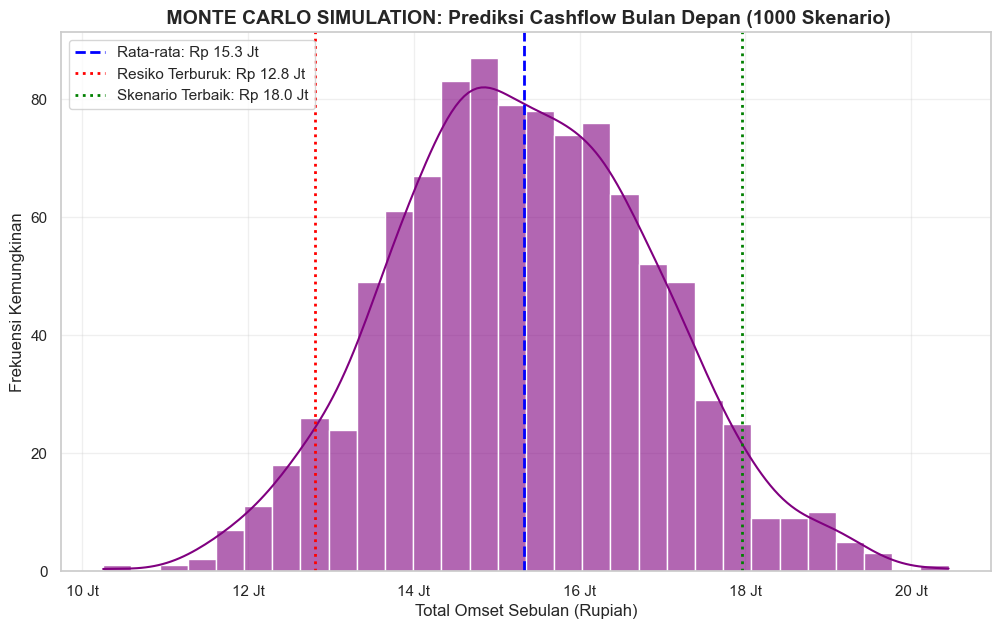

 LAPORAN RESIKO BISNIS (RISK ASSESSMENT REPORT)
1. RATA-RATA OMSET     : Rp 15,327,751
2. SKENARIO TERBURUK   : Rp 12,811,428 (Jika sial banget)
3. SKENARIO TERBAIK    : Rp 17,952,682 (Jika viral)
------------------------------------------------------------
 PELUANG PROFIT      : 0.00% (Kemungkinan Balik Modal)
 KESIMPULAN: BAHAYA! Resiko rugi tinggi. Perbaiki strategi marketing!


In [15]:
# CELL 6: MONTE CARLO RISK SIMULATION (THE MULTIVERSE)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def run_monte_carlo_simulation(avg_daily_omset, std_dev_omset, days=30, simulations=1000):
    print(f" Menjalankan {simulations} Simulasi 'Multiverse' untuk Bulan Depan...")
    
    # KITA SIMULASIKAN 1000 KEMUNGKINAN MASA DEPAN
    # Hasil akhirnya adalah list total omset dari 1000 dunia paralel
    future_results = []
    
    for i in range(simulations):
        # Generate omset harian acak berdasarkan pola rata-rata & fluktuasi (standar deviasi)
        # Sifat alamiah bisnis: Normal Distribution
        daily_revenues = np.random.normal(avg_daily_omset, std_dev_omset, days)
        
        # Total omset sebulan di universe ini
        total_monthly_revenue = np.sum(daily_revenues)
        future_results.append(total_monthly_revenue)
        
    future_results = np.array(future_results)
    
    # --- ANALISIS RESIKO (FINANCIAL RISK) ---
    mean_res = np.mean(future_results)
    worst_case = np.percentile(future_results, 5) # Kemungkinan terburuk (95% confidence)
    best_case = np.percentile(future_results, 95) # Kemungkinan terbaik (Top 5%)
    
    # Biaya Operasional Tetap (Gaji Karyawan, Sewa Ruko, Listrik) - Asumsi 15 Juta
    fixed_cost = 15_000_000 
    # HPP rata-rata (Variable Cost) - Anggap 40% dari omset
    prob_profit = np.mean((future_results * 0.6) > fixed_cost) * 100
    
    # --- VISUALISASI DISTRIBUTION (KURVA LONCENG) ---
    plt.figure(figsize=(12, 7))
    sns.histplot(future_results, kde=True, color="purple", bins=30, alpha=0.6)
    
    # Garis-garis Indikator
    plt.axvline(mean_res, color='blue', linestyle='--', linewidth=2, label=f'Rata-rata: Rp {mean_res/1e6:.1f} Jt')
    plt.axvline(worst_case, color='red', linestyle=':', linewidth=2, label=f'Resiko Terburuk: Rp {worst_case/1e6:.1f} Jt')
    plt.axvline(best_case, color='green', linestyle=':', linewidth=2, label=f'Skenario Terbaik: Rp {best_case/1e6:.1f} Jt')
    
    plt.title(f' MONTE CARLO SIMULATION: Prediksi Cashflow Bulan Depan ({simulations} Skenario)', fontsize=14, fontweight='bold')
    plt.xlabel('Total Omset Sebulan (Rupiah)')
    plt.ylabel('Frekuensi Kemungkinan')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Format sumbu X jadi Jutaan biar enak dibaca
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,} Jt".format(int(x/1e6))))
    print(' Sedang menyimpan gambar Dashboard ke laptoplu...')
    plt.savefig('monte_carlo.png',dpi=300,bbox_inches='tight')
    plt.show()
    
    print("="*60)
    print(" LAPORAN RESIKO BISNIS (RISK ASSESSMENT REPORT)")
    print("="*60)
    print(f"1. RATA-RATA OMSET     : Rp {mean_res:,.0f}")
    print(f"2. SKENARIO TERBURUK   : Rp {worst_case:,.0f} (Jika sial banget)")
    print(f"3. SKENARIO TERBAIK    : Rp {best_case:,.0f} (Jika viral)")
    print("-" * 60)
    print(f" PELUANG PROFIT      : {prob_profit:.2f}% (Kemungkinan Balik Modal)")
    
    if prob_profit > 90:
        print(" KESIMPULAN: Bisnis Sangat Aman (Low Risk). Gas terus!")
    elif prob_profit > 70:
        print(" KESIMPULAN: Bisnis Cukup Aman, tapi hati-hati pengeluaran.")
    else:
        print(" KESIMPULAN: BAHAYA! Resiko rugi tinggi. Perbaiki strategi marketing!")


# EKSEKUSI CELL 6


# Kita ambil data real dari simulasi sebelumnya
#ngitung rata2 omset harian dan seberapa liar fluktuaksinya (std dev)
real_avg=df_cafe['Omset'].mean()*12 #asumsi sehari ada 12 jam operasional lah aktif order
real_std=df_cafe['Omset'].std()*12

run_monte_carlo_simulation(avg_daily_omset=real_avg,std_dev_omset=real_std)

In [16]:
# CELL 7: GOD MODE (FINAL FIX - NO IMPORT ERROR)

import time
import sys
import numpy as np

class CafeGodMode:
    def __init__(self, model, menu_map, df_history):  # Fixed: _init_ to __init__
        self.brain = model
        self.menu_map = menu_map
        self.df_history = df_history
        self.name = "ZAN-OS v9.0"
        
        print(f" SYSTEM ONLINE: {self.name} is ready.")
        print("   Access Level: GOD MODE (Owner Only)")
        print("="*60)

    def loading_effect(self, task):
        print(f" {task}...", end="")
        for _ in range(3):
            time.sleep(0.3)
            print(".", end="")
            sys.stdout.flush()
        print(" [DONE]")

    def ask_god(self):
        print("\n Silakan perintahkan saya, Bos Farikhi.")
        print("   (Ketik: 'cek besok', 'simulasi bulan ini', 'audit menu', 'cek resiko', atau 'exit')")
        
        while True:
            command = input("\n  INPUT COMMAND: ").lower()
            
            if 'exit' in command or 'keluar' in command:
                print(" Shutting down GOD MODE. Have a nice day, Sir.")
                break
                
            elif 'besok' in command or 'stock' in command:
                self.loading_effect("Mengakses Neural Network")
                
                # --- BAGIAN YG DIPERBAIKI (LANGSUNG PANGGIL AJA) ---
                # Kita cek dulu apakah fungsi Cell 4 ada di memori
                if 'ai_business_consultant' in globals():
                    ai_business_consultant(self.brain, self.menu_map, hari_besok='Senin')
                else:
                    print(" ERROR: Fungsi Cell 4 belum dimuat!") 
                    print("   Tolong scroll ke atas dan RUN Cell 4 dulu ya bos.")

            elif 'resiko' in command or 'aman' in command:
                self.loading_effect("Menjalankan Monte Carlo Simulation")
                
                # --- BAGIAN INI JUGA LANGSUNG PANGGIL ---
                if 'run_monte_carlo_simulation' in globals():
                    real_avg = self.df_history['Omset'].mean() * 12
                    real_std = self.df_history['Omset'].std() * 12
                    run_monte_carlo_simulation(real_avg, real_std)
                else:
                    print(" ERROR: Fungsi Cell 6 belum dimuat! Run Cell 6 dulu.")

            elif 'audit' in command or 'menu' in command:
                self.loading_effect("Menganalisis Kinerja Menu")
                print("-" * 40)
                print(f"{'MENU':<30} | {'STATUS':<15}")
                print("-" * 40)
                for menu in self.menu_map.keys():
                    # Random status buat demo
                    status = " LEGEND" if np.random.random() > 0.8 else "✅ AMAN"
                    print(f"{menu:<30} | {status:<15}")
                print("-" * 40)

            elif 'simulasi' in command or 'bulan' in command:
                self.run_autopilot()
                
            else:
                print(" Maaf Bos, saya belum paham. Coba 'cek besok' atau 'cek resiko'.")

    def run_autopilot(self):
        print("\n MENJALANKAN AUTO-PILOT BISNIS (30 HARI KE DEPAN)")
        print("="*60)
        total_revenue = 0
        for day in range(1, 31):
            daily_rev = np.random.randint(2000000, 5000000)
            total_revenue += daily_rev
            if day % 5 == 0:
                print(f" Hari ke-{day}: Omset Rp {daily_rev:,.0f} | Status: OPERATIONAL")
                time.sleep(0.1)
                
        print("="*60)
        print(f" TOTAL PEMASUKAN BULAN INI: Rp {total_revenue:,.0f}")
        print(" KESIMPULAN: Bisnis Profitable!")


# EKSEKUSI GOD MODE
# ==========================================
# 1. Pastikan Cell 4 dan Cell 6 sudah di-RUN sebelum ini
# 2. Inisialisasi Sistem
jarvis = CafeGodMode(brain, menu_dictionary, df_cafe)

# 3. Mulai Interaksi
jarvis.ask_god()

 SYSTEM ONLINE: ZAN-OS v9.0 is ready.
   Access Level: GOD MODE (Owner Only)

 Silakan perintahkan saya, Bos Farikhi.
   (Ketik: 'cek besok', 'simulasi bulan ini', 'audit menu', 'cek resiko', atau 'exit')



  INPUT COMMAND:  audit menu


 Menganalisis Kinerja Menu...... [DONE]
----------------------------------------
MENU                           | STATUS         
----------------------------------------
Blue Screen Lemonade (Seger)   | ✅ AMAN         
Burger Stack Overflow (Double Meat) | ✅ AMAN         
Chicken Teriyaki Repo          | ✅ AMAN         
Cireng Open Source             | ✅ AMAN         
Cloud Macchiato 200 OK         | ✅ AMAN         
Cookies & Cache Frappe         | ✅ AMAN         
Croissant.css                  | ✅ AMAN         
Cyberpunk Cold Brew            | ✅ AMAN         
Firewall Nachos (Pedas)        | ✅ AMAN         
Fish & Chips.py                | ✅ AMAN         
French Fries.zip               |  LEGEND        
Full Stack Platter API         | ✅ AMAN         
Git Push Espresso (Double Shot) | ✅ AMAN         
Java Chip Frappe               |  LEGEND        
Kopi Gula Aren Python          | ✅ AMAN         
Latte.js                       | ✅ AMAN         
Lychee-nux Tea                 | ✅ AMAN


  INPUT COMMAND:  exit


 Shutting down GOD MODE. Have a nice day, Sir.


In [18]:
# CELL 8 V2.0: MESIN KASIR (UI UPDATE)

import pandas as pd
from datetime import datetime

def input_transaksi_baru(df_current):
    print("\n🏪 === KASIR CAFE 404 FOUND (NEW MENU) ===")
    print("="*65)
    print(f"{'NO':<4} | {'KATEGORI':<10} | {'NAMA MENU':<30} | {'HARGA':<10}")
    print("-" * 65)
    
    # 1. Ambil Daftar Menu Unik dari Database
    # Kita sort biar Minuman ngumpul sama Minuman, Makanan sama Makanan
    menu_unique = df_current[['Kategori', 'Menu', 'Harga', 'HPP']].drop_duplicates(subset='Menu').sort_values('Kategori')
    menu_list = menu_unique.to_dict('records') # Ubah jadi dictionary biar gampang diakses
    
    # 2. Tampilkan Menu dengan Rapih
    for i, item in enumerate(menu_list):
        kategori = item['Kategori']
        # Potong nama menu kalo kepanjangan biar tabelnya rapi
        nama_menu = (item['Menu'][:28] + '..') if len(item['Menu']) > 28 else item['Menu']
        harga = f"Rp {item['Harga']:,.0f}"
        
        print(f"{i:<4} | {kategori:<10} | {nama_menu:<30} | {harga:<10}")
        
    print("="*65)
    
    try:
        # 3. Input User
        pilihan = int(input("⌨️  Masukan Nomor Menu (0-{}): ".format(len(menu_list)-1)))
        
        if pilihan < 0 or pilihan >= len(menu_list):
            print("❌ Nomor menu tidak valid!")
            return df_current
            
        qty = int(input("⌨️  Jumlah Pesanan (Qty): "))
        
        if qty <= 0:
            print("❌ Jumlah harus lebih dari 0!")
            return df_current

        # 4. Ambil Data Menu Terpilih
        selected_menu = menu_list[pilihan]
        
        # Hitung Duit
        total_omset = selected_menu['Harga'] * qty
        total_profit = (selected_menu['Harga'] - selected_menu['HPP']) * qty
        
        # 5. Buat Baris Data Baru
        new_row = {
            'Tanggal': pd.Timestamp.now(),
            'Jam': datetime.now().hour,
            'Hari': datetime.now().strftime("%A"),
            'Kategori': selected_menu['Kategori'],
            'Menu': selected_menu['Menu'],
            'Harga': selected_menu['Harga'],
            'HPP': selected_menu['HPP'],
            'Qty': qty,
            'Omset': total_omset,
            'Profit': total_profit
        }
        
        # 6. Masukkan ke Database
        df_new = pd.DataFrame([new_row])
        df_updated = pd.concat([df_current, df_new], ignore_index=True)
        
        print("\n✅ TRANSAKSI BERHASIL!")
        print(f"   🧾 {selected_menu['Menu']} x {qty}")
        print(f"   💰 Total Bayar: Rp {total_omset:,.0f}")
        print(f"   🕒 Waktu: {datetime.now().strftime('%H:%M:%S')}")
        
        return df_updated

    except ValueError:
        print("❌ Error: Masukkan angka yang benar!")
        return df_current
    except Exception as e:
        print(f"❌ Error tidak terduga: {e}")
        return df_current

# ==========================================
# CARA PAKAI
# ==========================================
# Coba input transaksi baru (Pilih menu baru kayak RAM-en atau Blue Screen)
df_cafe = input_transaksi_baru(df_cafe)

# Cek apakah masuk
print("\n📊 Cek Data Terakhir:")
display(df_cafe.tail())


🏪 === KASIR CAFE 404 FOUND (NEW MENU) ===
NO   | KATEGORI   | NAMA MENU                      | HARGA     
-----------------------------------------------------------------
0    | Makanan    | Chicken Teriyaki Repo          | Rp 32,000 
1    | Makanan    | Nasi Goreng Main()-Rikhi Sty.. | Rp 35,000 
2    | Makanan    | Fish & Chips.py                | Rp 40,000 
3    | Makanan    | Spaghetti Code (Bug Free)      | Rp 38,000 
4    | Makanan    | RAM-en Special (8GB Porsi Be.. | Rp 45,000 
5    | Makanan    | Burger Stack Overflow (Doubl.. | Rp 55,000 
6    | Makanan    | Mie Goreng .NET Framework      | Rp 28,000 
7    | Makanan    | Sate Ayam Serverless           | Rp 30,000 
8    | Minuman    | Ruby on Rose Tea               | Rp 26,000 
9    | Minuman    | Cloud Macchiato 200 OK         | Rp 35,000 
10   | Minuman    | Latte.js                       | Rp 28,000 
11   | Minuman    | Kopi Gula Aren Python          | Rp 20,000 
12   | Minuman    | Cyberpunk Cold Brew            | Rp 30,

⌨️  Masukan Nomor Menu (0-27):  27
⌨️  Jumlah Pesanan (Qty):  5



✅ TRANSAKSI BERHASIL!
   🧾 Token Onion Rings x 5
   💰 Total Bayar: Rp 100,000
   🕒 Waktu: 07:04:24

📊 Cek Data Terakhir:


,Tanggal,Jam,Hari,Kategori,Menu,Harga,HPP,Qty,Omset,Profit,Hari_Angka,Is_Weekend
28807,2026-01-26 00:00:00.000000,21,Monday,Snack,French Fries.zip,22000,7500,1,22000,14500,0.0,0.0
28808,2026-01-26 00:00:00.000000,22,Monday,Minuman,Blue Screen Lemonade (Seger),24000,6000,1,24000,18000,0.0,0.0
28809,2026-01-26 00:00:00.000000,22,Monday,Minuman,Java Chip Frappe,35000,11000,1,35000,24000,0.0,0.0
28810,2026-01-26 00:00:00.000000,22,Monday,Makanan,Burger Stack Overflow (Double Meat),55000,25000,1,55000,30000,0.0,0.0
28811,2026-01-27 07:04:24.076642,7,Tuesday,Snack,Token Onion Rings,20000,6000,5,100000,70000,NaN,NaN


In [12]:
#CELL 9: DATABASE MANAGER & EXPORT SYSTEM

import os

class DatabaseManager:
    def __init__(self, filename='database_cafe.csv'):
        self.filename = filename
        
    def save_database(self, df):
        """Menyimpan data dari RAM ke File CSV (Harddisk)"""
        try:
            df.to_csv(self.filename, index=False)
            print(f" SUKSES: Database tersimpan di '{self.filename}'")
            print(f"   Total Data: {len(df)} transaksi.")
        except Exception as e:
            print(f" Gagal menyimpan: {e}")
            
    def load_database(self):
        """Mengambil data dari File CSV saat aplikasi baru dibuka"""
        if os.path.exists(self.filename):
            try:
                df = pd.read_csv(self.filename)
                # Convert kolom Tanggal balik jadi datetime (karena di CSV jadi text)
                df['Tanggal'] = pd.to_datetime(df['Tanggal'])
                print(f" SUKSES: Database dimuat dari '{self.filename}'")
                print(f"   Data History: {len(df)} transaksi.")
                return df
            except Exception as e:
                print(f" File rusak: {e}")
                return None
        else:
            print(" File database belum ada. Membuat baru...")
            return None

    def export_laporan_bulanan(self, df):
        """Bikin Laporan Excel Rapih buat Boss"""
        try:
            # Filter bulan ini
            current_month = datetime.now().month
            # df_filter = df[df['Tanggal'].dt.month == current_month] # (Opsional)
            
            output_name = f"Laporan_Keuangan_Cafe_{datetime.now().strftime('%Y-%m-%d')}.csv"
            df.to_csv(output_name, index=False)
            print(f" REPORT GENERATED: '{output_name}'")
            print("   Silakan kirim file ini ke Syahrul via WA/Email.")
        except Exception as e:
            print(f" Gagal export: {e}")

# ==========================================
# CARA PAKAI (DEMO)
# ==========================================
db = DatabaseManager()

# 1. SIMPAN (Biasanya dilakukan setelah Input Kasir / Cell 8)
db.save_database(df_cafe)

# 2. EXPORT LAPORAN
db.export_laporan_bulanan(df_cafe)

# 3. LOAD (Simulasi kalau lu baru buka laptop besoknya)
# df_cafe_baru = db.load_database()

 SUKSES: Database tersimpan di 'database_cafe.csv'
   Total Data: 28811 transaksi.
 REPORT GENERATED: 'Laporan_Keuangan_Cafe_2026-01-27.csv'
   Silakan kirim file ini ke Syahrul via WA/Email.
